<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Juliette, my name is Dmitrii Pyshnenko. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better:

- Add data rounding (calls/internet).
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div class="alert alert-block alert-info">
<b>Student's response</b>
 
Thank you for the feedback! I have gone through the project and updated my code.

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Hi Juliette, thank you for submitting your project with all corrections! 
- Now everything is perfect. No critial issues left, so your project has been accepted! 
- Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

The purpose of this project is to compare the two prepaid calling plans, Surf and Ultimate, to determine which brings in a greater amount of revenue. To conduct this analysis, I will first study the five individual datasets that were provided to me and clean/preprocess the data. Then, I will aggregate the data into a new dataframe, which will be used to study the differences in messaging, calling, and internet usage between the two plans.

I will also conduct hypothesis testing to determine if the revenue obtained between the two plans is significantly different and if the revenue obtained tends to vary by region.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you added additional information about the project goal and tasks.

# Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

## Load data

In [2]:
# Load the data files into different DataFrames

try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    msgs = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    print("One or more of the data files could not be read.")

# Prepare the data

There are five different dataframes to work with, so I will begin by taking a look at each of them. I will do preliminary corrections for each dataframe if needed.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The **plans** dataframe only has two rows and seems very straight forward. The columns `usd_per_gb` and `mb_per_month_included` reference two different values, megabytes (MB) and gigabytes (GB), where 1 GB = 1024 MB. I will add a `gb_per_month_included` column for easy reference and rename `plan_name` to `plan` to be used in the future when this dataframe is joined with others.

### Add `gb_per_month_included` column

In [5]:
# Creates a new column that converts MB included in a month to the GB equivalent
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024.0

# Show new dataframe
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Every month, users of the _Surf_ plan have a data allowance of 15 GB whereas users of the _Ultimate_ plan have a data allowance of 30 GB. We can more clearly see that the data allowance doubles for users of the _Ultimate_ plan.

In addition, we see that the _Ultimate_ man allows double the messages per month and 6x the amount of minutes. If a user exceeds the number of messages, minutes, or gb available in their plan, they have lower charges than a _Surf_ user. 

### Rename `plan_name` column

In [6]:
# Rename column
plans = plans.rename(columns = {"plan_name": "plan"})

# Show columns
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan', 'gb_per_month_included'],
      dtype='object')

## Users

In [7]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In the **users** dataframe, there are 500 unique users, and we have access to their ID, first name, last name, age, city, registration date, their plan, and in some cases, the `churn_date`, which is the day their services were terminated. In the future, it could be beneficial to look at the proportion of _surf_ users who terminated service versus the proportion of _ultimate_ users.

The missing values for `churn_date` makes sense, but I will create a binary column, `has_terminated_service`, that has a value of 1 if the service was terminated (non-null value in `churn_date`) or a 0 otherwise (meaning the service is still in use).

It will be difficult to make use of the information in the `city` column, so I will split the values in that column. I will also convert the date object values into the datetime format.

### Convert date columns

In [9]:
# Turn churn_date and reg_date columns into a date column
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

# Confirm datatype has been changed
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Add `has_terminated_service` column

In [10]:
# Add binary column based on if there is a value in churn_date
users['has_terminated_service'] = users['churn_date'].where(users['churn_date'].isnull(), '1')
users['has_terminated_service'] = users['has_terminated_service'].fillna('0')

### Split values in `city`

In [11]:
# Check all values
users['city'].str.contains('MSA').sum()

500

All values in `city` contains MSA which likely represents the country. Since this is the same among all columns, we can remove it from the `city` column and split city into `city` and `state`, separated by a comma.

In [12]:
# Remove country
users['city'] = users['city'].str[:-4]

# Extract state
users['state'] = users['city'].str.split(",").str[1]
users['city'] = users['city'].str.split(",").str[0]

In [13]:
# Check new dataframe
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,has_terminated_service,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,0,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,0,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,0,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,0,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,0,WA
5,1005,Livia,Shields,31,Dallas-Fort Worth-Arlington,2018-11-29,surf,NaT,0,TX
6,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,2018-12-18,1,CA
7,1007,Eusebio,Welch,42,Grand Rapids-Kentwood,2018-07-11,surf,NaT,0,MI
8,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,NaT,0,FL
9,1009,Gerry,Little,19,San Jose-Sunnyvale-Santa Clara,2018-04-22,surf,NaT,0,CA


## Calls

In [14]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Print a sample of data for calls
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


The **calls** dataframe looks good. It has no null values. The only changes I will make will be converting `call_date` into the datetime format and then renaming `duration` to `minutes` to make that column clearer. I will also create a `month` column and round up the `duration` column since seconds are rounded to minutes.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Good start and first view on data! 

### Date column updates

In [16]:
# Turn call_date column into a date column
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Create a year column
calls['year'] = calls['call_date'].dt.year

# Create a month column
calls['month'] = calls['call_date'].dt.month

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

<div class="alert alert-info">
<b>Student Response:</b> 
    
Thank you for this advice! I saw in the description that we only had one year but this is helpful, I will use datetime64[M] in the future to aggregate by a complete date.
</div>


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
🙌

### Rename and round up `duration`

In [17]:
# Rename duration to minutes
calls = calls.rename(columns = {"duration": "call_minutes"})

# Round up duration
calls['call_minutes'] = calls['call_minutes'].apply(np.ceil)

# Check data
calls.head()

,id,user_id,call_date,call_minutes,year,month
0,1000_93,1000,2018-12-27,9.0,2018,12
1,1000_145,1000,2018-12-27,14.0,2018,12
2,1000_247,1000,2018-12-27,15.0,2018,12
3,1000_309,1000,2018-12-28,6.0,2018,12
4,1000_380,1000,2018-12-30,5.0,2018,12


<div class="alert alert-info">
<b>Student Response:</b> 
    
I have rounded up call_minutes here.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Ok, great job! Also, great choice of np.ceil () method

You can apply this method directly to the column in your data in the following way:

```
calls['duration'] = np.ceil(calls['duration'])
```

## Messages

In [18]:
# Print the general/summary information about the messages' DataFrame
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Print a sample of data for messages
msgs.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Like the **calls** dataframe, I will convert `message_date` into the datetime format and create a `month` column.

### Date column updates

In [20]:
# Turn message_date column into a date column
msgs['message_date'] = pd.to_datetime(msgs['message_date'])

# Create month column
msgs['month'] = msgs['message_date'].dt.month

# Confirm datatype has been changed
msgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


## Internet

In [21]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Print a sample of data for the internet traffic
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


`session_date` will be converted to a datetime format. Additionally, I will create a `gb_used` column based on the `mb_used` column for reference.

### Date column updates

In [23]:
# Turn session_date column into a date column
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Creating month column
internet['month'] = internet['session_date'].dt.month

# Confirm update
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


### Created `gb_used` column

In [24]:
# Create gb_used column
internet['gb_used'] = internet['mb_used'] / 1024

# Check data
internet.head()

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


# Aggregate data per user

The data is now clean. Because there are five dataframes, it would be beneficial to aggregate this data to be used later in our analysis. 

All of the dates are from the year 2018. I will group the data by each user and month so that it's possible to see calls, minutes, messages, and gb used by each user during each month. This dataframe can be used to analyze the _Surf_ and _Ultimate_ plans.

In [25]:
# Pivot table showing number of calls per month that each user made
calls_per_month = pd.pivot_table(calls, index = ['user_id', 'month'], 
                                 values = 'id', 
                                 aggfunc = 'count').reset_index()

# Renaming column for clarity
calls_per_month = calls_per_month.rename(columns = {"id": "total_calls"})

# Showing table
calls_per_month

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [26]:
# Pivot table showing amount of minutes per month that each user made (for calls)
minutes_per_month = pd.pivot_table(calls, index = ['user_id', 'month'], 
                                 values = 'call_minutes', 
                                 aggfunc = 'sum').reset_index()

minutes_per_month = minutes_per_month.rename(columns = {"call_minutes": "total_minutes"})

# Showing table
minutes_per_month

,user_id,month,total_minutes
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Please note that the telecom operator rounds up all minutes and traffic values.

`Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.`

Can you please add data rounding?

<div class="alert alert-info">
<b>Student Response:</b> 
    
I have rounded up the seconds -> minutes in section 4.3.2 now.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In pivot_table or groupby it is possible to pass multiple arguments, so here, you can create an aggregated table in one go like this:
    
data_calls.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()
    
or
    
data_calls.pivot_table(index = ('user_id','month'), values = 'duration', aggfunc = ('count','sum')).reset_index()

<div class="alert alert-info">
<b>Student Response:</b> 
    
Thank you for this advice!
</div>

In [27]:
# Pivot table showing average duration of calls of each user (for calls)
avg_minutes_per_month = pd.pivot_table(calls, index = ['user_id', 'month'], 
                                 values = 'call_minutes', 
                                 aggfunc = 'mean').reset_index()
# Renaming column
avg_minutes_per_month = avg_minutes_per_month.rename(columns = {"call_minutes": "avg_minutes"})

# Showing table
avg_minutes_per_month

,user_id,month,avg_minutes
0,1000,12,7.750000
1,1001,8,6.740741
2,1001,9,6.428571
3,1001,10,6.046154
4,1001,11,6.656250
...,...,...,...
2253,1498,12,8.692308
2254,1499,9,8.439024
2255,1499,10,7.264151
2256,1499,11,6.844444


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Now, everything is correct. Thank you for fixing that! 

In [28]:
# Pivot table showing number of messages sent by each user per month
msgs_per_month = pd.pivot_table(msgs, index = ['user_id', 'month'], 
                                 values = 'id', 
                                 aggfunc = 'count').reset_index()

# Renaming id column for clarity
msgs_per_month = msgs_per_month.rename(columns = {"id": "total_messages"})

# Showing table
msgs_per_month

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [29]:
# Calculate the volume of internet traffic used by each user per month
traffic_per_month = pd.pivot_table(internet, index = ['user_id', 'month'], 
                                 values = 'gb_used', 
                                 aggfunc = 'sum').reset_index()

# Round up gb_used
traffic_per_month['gb_used'] = traffic_per_month['gb_used'].apply(np.ceil)

# Showing table
traffic_per_month

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


<div class="alert alert-info">
<b>Student Response:</b> 
    
I have rounded up gb_used here.
</div>

Next, I will aggregate these pivot tables into one dataframe.

In [30]:
# Merging data for calls, minutes, messages, internet for each user_id and month combination
user_usage = calls_per_month.merge(
    minutes_per_month, on=['user_id', 'month'], how='outer').merge(
    avg_minutes_per_month, on=['user_id', 'month'], how='outer').merge(
    msgs_per_month, on=['user_id', 'month'], how='outer').merge(
    traffic_per_month, on=['user_id', 'month'], how='outer'
).sort_values(by=['user_id', 'month'])

# Checking values
user_usage.head(10)

,user_id,month,total_calls,total_minutes,avg_minutes,total_messages,gb_used
0,1000,12,16.0,124.0,7.750000,11.0,2.0
1,1001,8,27.0,182.0,6.740741,30.0,7.0
2,1001,9,49.0,315.0,6.428571,44.0,14.0
3,1001,10,65.0,393.0,6.046154,53.0,22.0
4,1001,11,64.0,426.0,6.656250,36.0,19.0
5,1001,12,56.0,412.0,7.357143,44.0,19.0
6,1002,10,11.0,59.0,5.363636,15.0,7.0
7,1002,11,55.0,386.0,7.018182,32.0,19.0
8,1002,12,47.0,384.0,8.170213,41.0,15.0
9,1003,12,149.0,1104.0,7.409396,50.0,27.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer' can be used here to prevent data loss.
    
By the way, it is also possible to group 3 tables at once using reduce. You can read about it here: https://www.codegrepper.com/code-examples/python/merge+more+than+2+dataframes+in+pandas

In [31]:
# Add the plan of each user
user_usage = user_usage.merge(users[['user_id', 'plan']], on = 'user_id', how = 'left')

In [32]:
# Filling null values 
user_usage['total_calls'] = user_usage['total_calls'].fillna(0)
user_usage['total_minutes'] = user_usage['total_minutes'].fillna(0)
user_usage['avg_minutes'] = user_usage['avg_minutes'].fillna(0)
user_usage['total_messages'] = user_usage['total_messages'].fillna(0)
user_usage['gb_used'] = user_usage['gb_used'].fillna(0)

# Checking they were filled
user_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   total_calls     2293 non-null   float64
 3   total_minutes   2293 non-null   float64
 4   avg_minutes     2293 non-null   float64
 5   total_messages  2293 non-null   float64
 6   gb_used         2293 non-null   float64
 7   plan            2293 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 161.2+ KB


In [33]:
# Viewing aggregated dataframe
user_usage

,user_id,month,total_calls,total_minutes,avg_minutes,total_messages,gb_used,plan
0,1000,12,16.0,124.0,7.750000,11.0,2.0,ultimate
1,1001,8,27.0,182.0,6.740741,30.0,7.0,surf
2,1001,9,49.0,315.0,6.428571,44.0,14.0,surf
3,1001,10,65.0,393.0,6.046154,53.0,22.0,surf
4,1001,11,64.0,426.0,6.656250,36.0,19.0,surf
...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,8.692308,0.0,23.0,surf
2289,1499,9,41.0,346.0,8.439024,0.0,13.0,surf
2290,1499,10,53.0,385.0,7.264151,0.0,20.0,surf
2291,1499,11,45.0,308.0,6.844444,0.0,17.0,surf


## Monthly revenue per user

Next, I will calculate the revenue obtained from each user.

If a user was within the limits for their plan (sent fewer messages than their plan offers, used fewer minutes than their plan offers, and used fewer gb than their plan offers), then the revenue made from that user would be \$20 if they have the _Surf_ plan or \$70 if they have the _Ultimate_ plan.

If a user exceeded the limits in their plan, then they were charged for each extra message, minute, or GB used, with lower charges in the _Ultimate_ plan than the _Surf_ plan.

In [34]:
# creating dictionaries that show what is included in each plan
surf_included = plans.loc[0].to_dict()
ultimate_included = plans.loc[1].to_dict()

# print example
ultimate_included

{'messages_included': 1000,
 'mb_per_month_included': 30720,
 'minutes_included': 3000,
 'usd_monthly_pay': 70,
 'usd_per_gb': 7,
 'usd_per_message': 0.01,
 'usd_per_minute': 0.01,
 'plan': 'ultimate',
 'gb_per_month_included': 30.0}

In [35]:
# subtract the minutes/messages/gb used by what was included in the plan
# if negative, then user was within limits, so no extra profit obtained.
# the "used" column is rounded up 
def get_extra_charges(used, included):
    overflow = math.ceil(used) - included
    return max(0, overflow)

# get revenue obtained 
def get_revenue(plan, total_minutes, total_messages, gb_used):
    
    # set plan
    plan_included = surf_included if plan == "surf" else ultimate_included
    
    # set values included in plan
    minutes_included = plan_included['minutes_included']
    messages_included = plan_included['messages_included']
    gb_included = plan_included['gb_per_month_included']
    
    # set charges
    monthly_price = plan_included['usd_monthly_pay']
    extra_gb_charge = plan_included['usd_per_gb']
    extra_message_charge = plan_included['usd_per_message']
    extra_minute_charge = plan_included['usd_per_minute']
    
    # subtract total value minus what's provided in the plan - overflow that profit was earned on
    extra_minutes = get_extra_charges(total_minutes, minutes_included)
    extra_messages = get_extra_charges(total_messages, messages_included)
    extra_gb = get_extra_charges(gb_used, gb_included)
    
    # multiply to determine profit
    minutes_profit = extra_minutes * extra_minute_charge
    message_profit = extra_messages * extra_message_charge
    gb_profit = extra_gb * extra_gb_charge
    
    # sum for total profit
    revenue = (minutes_profit + message_profit + gb_profit + monthly_price).round(2)
    
    return revenue

In [36]:
# apply function and show
user_usage['monthly_revenue'] = user_usage.apply(lambda x: get_revenue(x.plan, x.total_minutes, x.total_messages, x.gb_used), axis = 1)
user_usage.head()

,user_id,month,total_calls,total_minutes,avg_minutes,total_messages,gb_used,plan,monthly_revenue
0,1000,12,16.0,124.0,7.750000,11.0,2.0,ultimate,70.00
1,1001,8,27.0,182.0,6.740741,30.0,7.0,surf,20.00
2,1001,9,49.0,315.0,6.428571,44.0,14.0,surf,20.00
3,1001,10,65.0,393.0,6.046154,53.0,22.0,surf,90.09
4,1001,11,64.0,426.0,6.656250,36.0,19.0,surf,60.00


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here, but results will be slightly different because of the data rounding. 
    
Btw it is also possible to make the calculation of revenue a little bit differently using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```
    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using `.clip()` (a useful method in many tasks). You can read about it here: [https://www.pythonpool.com/numpy-clip/](https://www.pythonpool.com/numpy-clip/)

    total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']

<div class="alert alert-info">
<b>Student Response:</b> 
    
These are extremely helpful! Thank you for the resources/alternative solutions.
</div>

# Study user behaviour

Now that we have a dataframe with the aggregated information, we can split it into dataframes for users of each plan.

Using these dataframes, I will perform analysis on the dataset. I will look at the behavior of users in each plan when it comes to calling, messaging, and internet usage by plotting graphs. I will also compare the revenue obtained from each plan and observe how it differs.

In [37]:
# creating separate dataframes for surf and ultimate plans
surf_users = user_usage.query('plan == "surf"')
ultimate_users = user_usage.query('plan == "ultimate"')

### Calls

First, I will look at the behavior of users in both plans when it comes to calling.

<AxesSubplot:title={'center':'Ultimate Users - Average Call Duration Per Month'}, xlabel='Month', ylabel='Average Number of Minutes'>

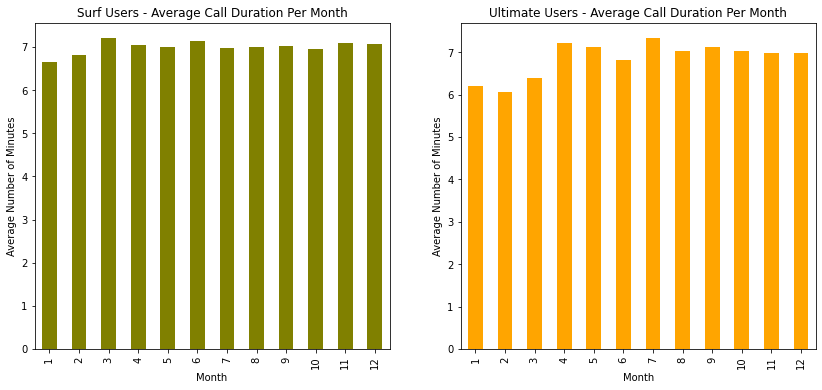

In [38]:
# comparing average duration of calls per each plan per each distinct month
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# surf plan bar plot
surf_users.pivot_table(index='month', values='avg_minutes', aggfunc='mean').plot(
    kind = 'bar',
    xlabel = 'Month',
    ylabel = 'Average Number of Minutes',
    title = 'Surf Users - Average Call Duration Per Month',
    color = 'olive',
    legend = False,
    ax = ax[0])

# ultimate plan bar plot
ultimate_users.pivot_table(index='month', values='avg_minutes', aggfunc='mean').plot(
    kind = 'bar',
    xlabel = 'Month',
    ylabel = 'Average Number of Minutes',
    title = 'Ultimate Users - Average Call Duration Per Month',
    color = 'orange',
    legend = False,
    ax = ax[1])

From the bar plots above, we can see that users with the _Surf_ plan have on average a more consistent call durarion through the year than users with the _Ultimate_ plan. There is a noticeable dip in _Ultimate_ call duration activity during the first three months of the year.

Text(0.5, 0, 'Average Minutes Used')

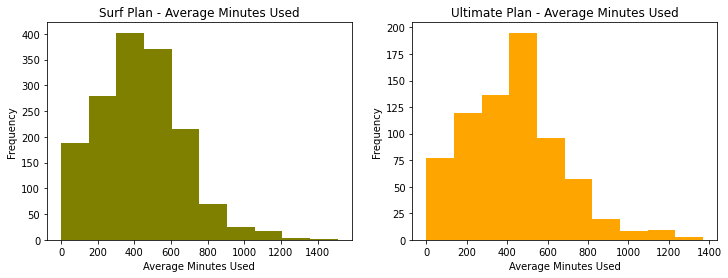

In [39]:
# comparing the number of minutes users of each plan require each month using a histogram
fig, ax = plt.subplots(ncols=2, figsize=(12,4))

# surf plan histogram
surf_users['total_minutes'].plot(kind = 'hist',
                                 bins = 10,
                                 xlabel = 'Average Total Duration (Minutes)',
                                 ylabel = 'Months',
                                 color = 'olive',
                                 ax = ax[0])

# ultimate plan histogram
ultimate_users['total_minutes'].plot(kind = 'hist',
                                 bins = 10,
                                 xlabel = 'Average Total Duration (Minutes)',
                                 ylabel = 'Months',
                                 color = 'orange',
                                 ax = ax[1])

# set labels
ax[0].title.set_text("Surf Plan - Average Minutes Used")
ax[1].title.set_text("Ultimate Plan - Average Minutes Used")
ax[0].set_xlabel("Average Minutes Used")
ax[1].set_xlabel("Average Minutes Used")

In [40]:
# Calculate the mean and the variance of the monthly call duration

print('Surf Plan:')
print(f'Average call duration: {surf_users.avg_minutes.mean().round(3)} minutes')
print(f'Variance of call duration: {surf_users.avg_minutes.var().round(3)} minutes')
print(f'Average total call duration: {surf_users.total_minutes.mean().round(3)} minutes')
print(f'Median total call duration: {surf_users.total_minutes.median().round(3)} minutes')
print(f'Variance of total call duration: {surf_users.total_minutes.var().round(3)} minutes\n')

print('Ultimate Plan:')
print(f'Average call duration: {ultimate_users.avg_minutes.mean().round(3)} minutes')
print(f'Variance of call duration: {ultimate_users.avg_minutes.var().round(3)} minutes')
print(f'Average total call duration: {ultimate_users.total_minutes.mean().round(3)} minutes')
print(f'Median total call duration: {ultimate_users.total_minutes.median().round(3)} minutes')
print(f'Variance of total call duration: {ultimate_users.total_minutes.var().round(3)} minutes')

Surf Plan:
Average call duration: 7.031 minutes
Variance of call duration: 2.102 minutes
Average total call duration: 428.75 minutes
Median total call duration: 425.0 minutes
Variance of total call duration: 54968.279 minutes

Ultimate Plan:
Average call duration: 7.01 minutes
Variance of call duration: 1.39 minutes
Average total call duration: 430.45 minutes
Median total call duration: 424.0 minutes
Variance of total call duration: 57844.465 minutes


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
It's great that you managed to calculate all the necessary metrics and display them in the table.

There is also a way to display all statistical metrics in one table (you can pass all metrics to aggfunc at once.), using, for example, pivot_table:

`data.pivot_table(index= 'tariff', values= '...', aggfunc= ['mean', 'var','std', 'median'])`

<div class="alert alert-block alert-info">
<b>Student's response</b>
 
This is significantly cleaner, thank you!

There are more users in the Surf Plan than the Ultimate Plan which is why the distribution in the Ultimate Plan has a more limited yaxis - however, both distributions are similar. Each is right skewed. The Surf Plan peaks around 300 minutes whereas the Ultimate Plan peaks around 400 minutes a month - therefore, there are proportionally more Ultimate users using a greater amount of minutes each month. However, the Ultimate plan offers double the amount of minutes (1000 vs 500) than the Surf plan.

Though the average call durations doesn't vary much between the plans (with Surf pkan users having slightly longer calls on average), users of the Ultimate plan on average use 2 more minutes more than Surf users. However, the median total minutes used is higher for Surf plan users.

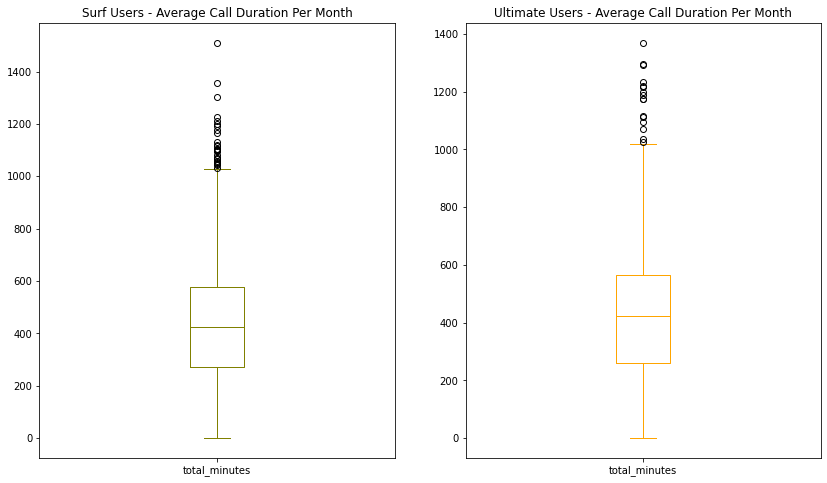

In [41]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# comparing average duration of calls per each plan per each distinct month
fig, ax = plt.subplots(ncols=2, figsize=(14,8))

# surf plan box plot
surf_users['total_minutes'].plot(kind = 'box',
                                 title = 'Surf Users - Average Call Duration Per Month',
                                 color = 'olive',
                                 ax = ax[0]);

# ultimate plan box plot
ultimate_users['total_minutes'].plot(kind = 'box',
                                 title = 'Ultimate Users - Average Call Duration Per Month',
                                 color = 'orange',
                                 ax = ax[1],
                                 yticks = np.arange(0, 1401, 200));

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In order not to show auxiliary python outputs like "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90 ', you can add a semicolon or plt.show () at the end of the line.

<div class="alert alert-info">
<b>Student Response:</b> 
    
I was wondering how to do this - thank you, it's been updated.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
That looks very neat and clean.

In all, there is little difference between how users of the two different plans use their minutes. The Surf plan offers a base 500 minutes whereas the Ultimate plan offers a base 3000 minutes - both averages are below these margins, around 400 minutes. You would expect users of the Ultimate plan to use significantly more minutes than those on the Surf plan, but that is not the case. 

### Messages

Next, I will observe the behavior of users when it comes to sending messages.

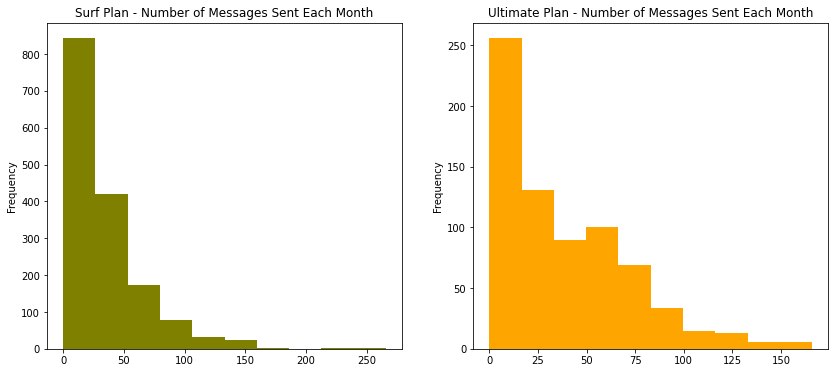

In [42]:
# comparing the number of messages users of each plan tend to send each month
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_users['total_messages'].plot(kind = 'hist',
                                  title = 'Surf Plan - Number of Messages Sent Each Month',
                                  xlabel = 'Number of Messages',
                                  color = 'olive', 
                                  ax = ax[0]
                                 );

# plot users of ultimate plan
ultimate_users['total_messages'].plot(kind = 'hist',
                                  title = 'Ultimate Plan - Number of Messages Sent Each Month',
                                  xlabel = 'Number of Messages',
                                  color = 'orange', 
                                  ax = ax[1]
                                 );

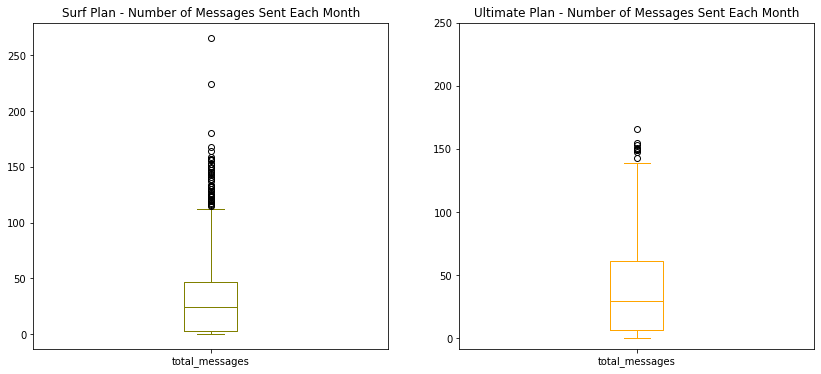

In [43]:
# comparing the number of messages users of each plan tend to send each month
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_users['total_messages'].plot(kind = 'box',
                                  title = 'Surf Plan - Number of Messages Sent Each Month',
                                  xlabel = 'Number of Messages',
                                  color = 'olive', 
                                  ax = ax[0]
                                 );

# plot users of ultimate plan
ultimate_users['total_messages'].plot(kind = 'box',
                                  title = 'Ultimate Plan - Number of Messages Sent Each Month',
                                  xlabel = 'Number of Messages',
                                  color = 'orange', 
                                  ax = ax[1],
                                  yticks = np.arange(0, 251, 50)
                                 );

In [44]:
# information about messaging for users in the ultimate plan
ultimate_users['total_messages'].describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: total_messages, dtype: float64

In [45]:
# information about messaging for users in the surf plan
surf_users['total_messages'].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: total_messages, dtype: float64

In terms of messaging, users in the ultimate plan tend to send more messages on average. There are a few outliers in the surf plan that drive up the average amount sent per month.

Despite this, both plans are, on average, under the limit for their respective plans (50 for Surf, 1000 for Ultimate). Like calling minutes, the average for Surf users is proportionally very close to the limit.

### Internet

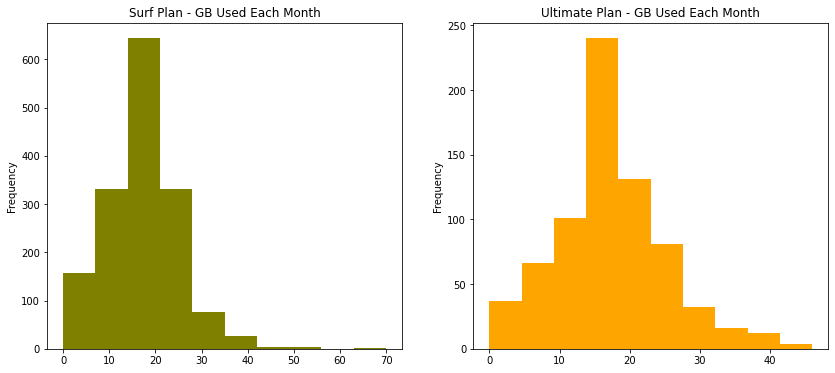

In [46]:
# Compare the amount of internet traffic consumed by users per plan
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_users['gb_used'].plot(kind = 'hist',
                                  title = 'Surf Plan - GB Used Each Month',
                                  xlabel = 'GB',
                                  color = 'olive', 
                                  ax = ax[0]
                                 );

# plot users of ultimate plan
ultimate_users['gb_used'].plot(kind = 'hist',
                                  title = 'Ultimate Plan - GB Used Each Month',
                                  xlabel = 'GB',
                                  color = 'orange', 
                                  ax = ax[1]
                                 );

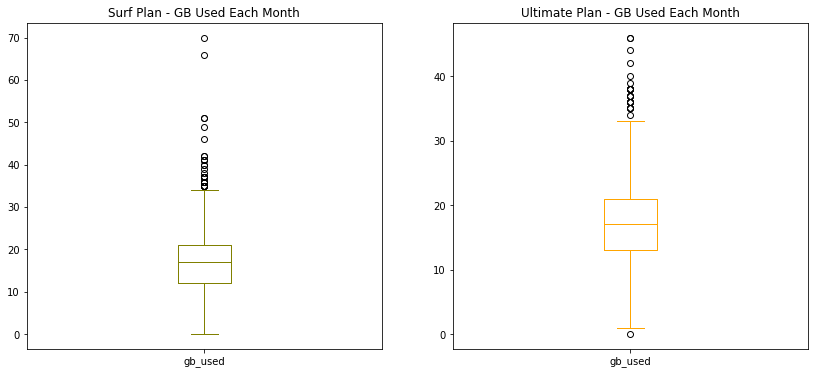

In [47]:
# Compare the amount of internet traffic consumed by users per plan
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_users['gb_used'].plot(kind = 'box',
                                  title = 'Surf Plan - GB Used Each Month',
                                  xlabel = 'GB',
                                  color = 'olive', 
                                  ax = ax[0]
                                 );

# plot users of ultimate plan
ultimate_users['gb_used'].plot(kind = 'box',
                                  title = 'Ultimate Plan - GB Used Each Month',
                                  xlabel = 'GB',
                                  color = 'orange', 
                                  ax = ax[1]
                                 );

In [48]:
# describe gb used for surf plan
surf_users['gb_used'].describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

In [49]:
# describe gb used for ultimate plan
ultimate_users['gb_used'].describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used, dtype: float64

Users with the Ultimate plan tend to use more GB on average. While users of both plans tend to peak under 20 GB, there's a larger proportion of users on the Ultimate plan who use upwards of 20, 30, or 40 GB. Users of the Surf plan using this much data are, in proportion, significantly smaller. See below:

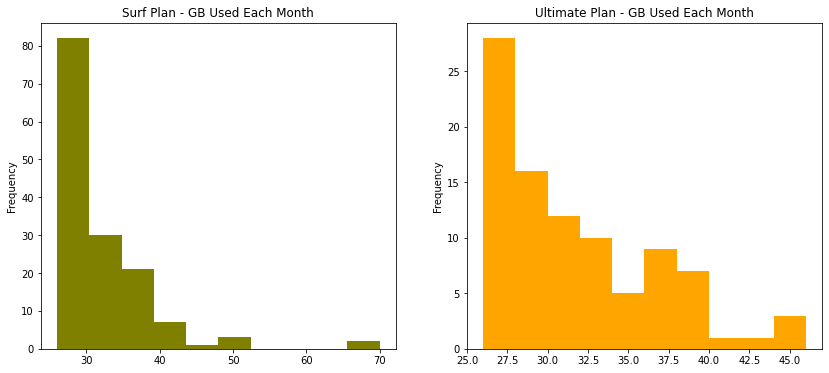

In [50]:
# Compare the amount of internet traffic consumed by users per plan
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_users.query('gb_used > 25')['gb_used'].plot(kind = 'hist',
                                  title = 'Surf Plan - GB Used Each Month',
                                  xlabel = 'GB',
                                  color = 'olive', 
                                  ax = ax[0]
                                 );

# plot users of ultimate plan
ultimate_users.query('gb_used > 25')['gb_used'].plot(kind = 'hist',
                                  title = 'Ultimate Plan - GB Used Each Month',
                                  xlabel = 'GB',
                                  color = 'orange', 
                                  ax = ax[1]
                                 );

When we only compare users that use 25 GB+, there is a higher proportion of Ultimate users. Note, however, that there are more Surf users overall, and the Surf plan also contains the highest amount of GB usage in the entire dataset. These outliers are important, as extra GB usage can be expensive - an additional $7-10 for Ultimate and Surf plans.

# Revenue

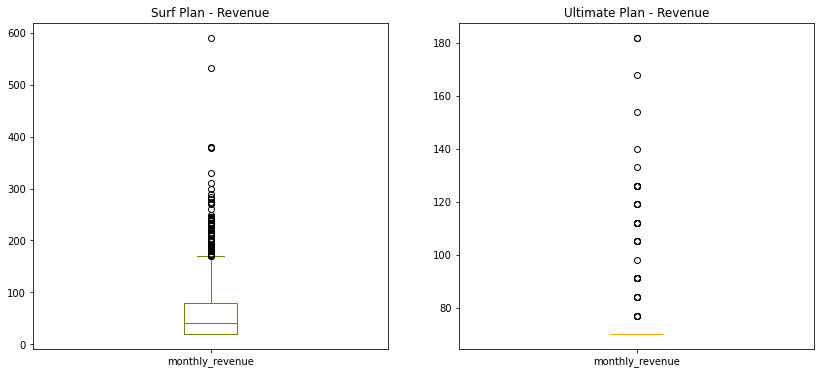

In [51]:
# Compare the amount of internet traffic consumed by users per plan
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_users['monthly_revenue'].plot(kind = 'box',
                                  title = 'Surf Plan - Revenue',
                                  xlabel = 'Revenue',
                                  color = 'olive', 
                                  ax = ax[0]
                                 );

# plot users of ultimate plan
ultimate_users['monthly_revenue'].plot(kind = 'box',
                                  title = 'Ultimate Plan - Revenue',
                                  xlabel = 'Revenue',
                                  color = 'orange', 
                                  ax = ax[1]
                                 );

In [52]:
# see revenue info about surf users
surf_users['monthly_revenue'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: monthly_revenue, dtype: float64

In [53]:
# see revenue info about ultimate users
ultimate_users['monthly_revenue'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: monthly_revenue, dtype: float64

The outliers in the dataset are even more apparent when it comes to comparing the revenue generated each month. Notably, Q1-Q3 are all the same value for users of the Ultimate plan. I will conduct this analysis on both the outliers and data points that fall within the normal range.

In [54]:
# method to get upper limit (to exclude outliers)
def get_upper_limit(df):
    Q1 = df.monthly_revenue.quantile(0.25)
    Q3 = df.monthly_revenue.quantile(0.75)
    IQR = Q3 - Q1
    return Q3 + 1.5 * IQR

# get upper limits
surf_limit = get_upper_limit(surf_users)
ultimate_limit = get_upper_limit(ultimate_users)

In [55]:
print(f'Surf Upper Limit: {surf_limit}')
print(f'Ultimate Upper Limit: {ultimate_limit}')

Surf Upper Limit: 170.89999999999998
Ultimate Upper Limit: 70.0


In [56]:
surf_outliers = surf_users.query('monthly_revenue > @surf_limit').reset_index(drop=True)
surf_normal = surf_users.query('monthly_revenue <= @surf_limit').reset_index(drop=True)

ultimate_outliers = ultimate_users.query('monthly_revenue > @ultimate_limit').reset_index(drop=True)
ultimate_normal = ultimate_users.query('monthly_revenue <= @ultimate_limit').reset_index(drop=True)

First, I will look at the revenue generated of the datasets without the outliers.

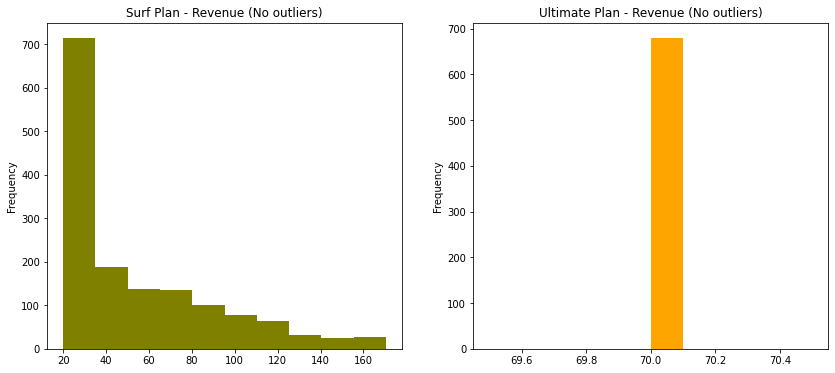

In [57]:
# Compare the amount of internet traffic consumed by users per plan
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_normal['monthly_revenue'].plot(kind = 'hist',
                                  title = 'Surf Plan - Revenue (No outliers)',
                                  xlabel = 'Revenue',
                                  color = 'olive', 
                                  ax = ax[0]
                                 );

# plot users of ultimate plan
ultimate_normal['monthly_revenue'].plot(kind = 'hist',
                                  title = 'Ultimate Plan - Revenue (No outliers)',
                                  xlabel = 'Revenue',
                                  color = 'orange', 
                                  ax = ax[1]
                                 );

The upper limit of `monthly_revenue` was 70 GB, so it is no surprise that monthly_revenue has a single value. We can see that for non-outliers, there's a significantly greater amount of variation for the Surf plan than the Ultimate plan. 

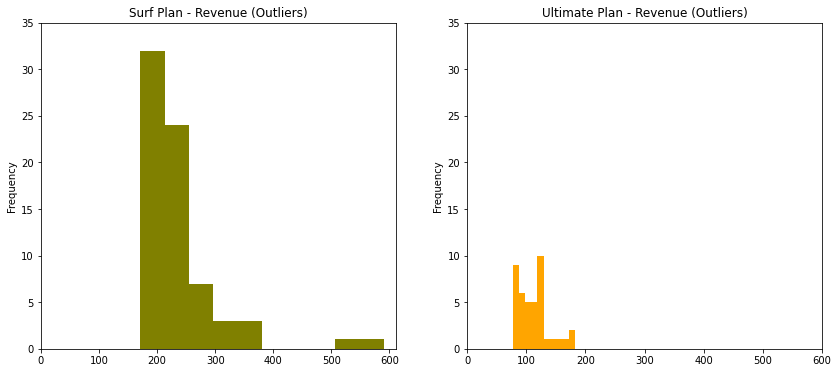

In [58]:
# Compare the revenue
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_outliers['monthly_revenue'].plot(kind = 'hist',
                                  title = 'Surf Plan - Revenue (Outliers)',
                                  xlabel = 'Revenue',
                                  color = 'olive', 
                                  ax = ax[0],
                                      xticks = np.arange(0, 601, 100),
                                      yticks = np.arange(0, 36, 5)
                                 );

# plot users of ultimate plan
ultimate_outliers['monthly_revenue'].plot(kind = 'hist',
                                  title = 'Ultimate Plan - Revenue (Outliers)',
                                  xlabel = 'Revenue',
                                  color = 'orange', 
                                  ax = ax[1],
                                          xticks = np.arange(0, 601, 100),
                                          yticks = np.arange(0, 36, 5)
                                 );

In [59]:
# outlier information
surf_outliers['monthly_revenue'].describe()

count     71.000000
mean     236.926197
std       73.265982
min      170.900000
25%      194.885000
50%      220.000000
75%      244.845000
max      590.370000
Name: monthly_revenue, dtype: float64

In [60]:
# outlier information
ultimate_outliers['monthly_revenue'].describe()

count     41.000000
mean     110.634146
std       27.165931
min       77.000000
25%       91.000000
50%      112.000000
75%      126.000000
max      182.000000
Name: monthly_revenue, dtype: float64

The histograms showing the revenue generated from the outlier data shows these two plans on the same scale. There are not only more users who have the surf plan, but there are also more users who are outliers that generate more revenue for the company. Some of these outliers are generating upwards of $300 per month, which is never generated by the Ultimate plan. Likely, this is due to exceeding the amount of GB used. 

## Total generated by each plan

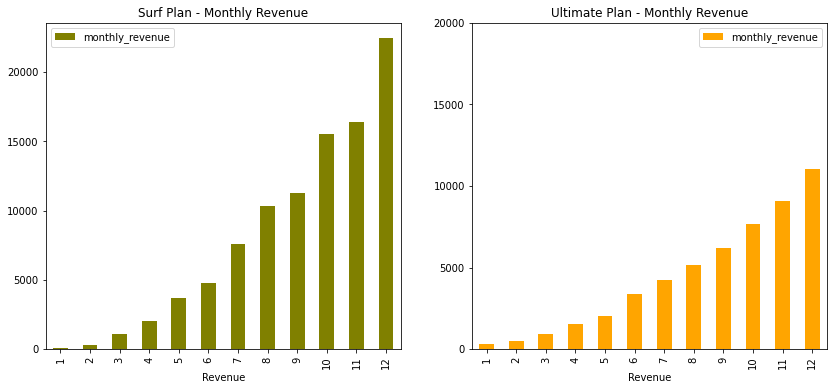

In [61]:
# Compare the revenue generated per month
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# plot users of surf plan
surf_users.pivot_table(index = 'month', values = 'monthly_revenue', aggfunc = 'sum').plot(kind = 'bar',
                                  title = 'Surf Plan - Monthly Revenue',
                                  xlabel = 'Revenue',
                                  color = 'olive', 
                                  ax = ax[0],
                                 );

# plot users of ultimate plan
ultimate_users.pivot_table(index = 'month', values = 'monthly_revenue', aggfunc = 'sum').plot(kind = 'bar',
                                  title = 'Ultimate Plan - Monthly Revenue',
                                  xlabel = 'Revenue',
                                  color = 'orange', 
                                  ax = ax[1],
                                  yticks = np.arange(0, 20001, 5000)
                                 );

In [62]:
# print total amount generated over the year for each plan
print(f'Total amount generated by the surf plan: ${surf_users.monthly_revenue.sum()}')
print(f'Total amount generated by the ultimate plan: ${ultimate_users.monthly_revenue.sum()}')

Total amount generated by the surf plan: $95491.18
Total amount generated by the ultimate plan: $52066.0


There are significantly more users apart of the surf plan than the ultimate plan, and consequently there are more users who exceed the base limits who are apart of the surf plan. The ultimate plan offers consistency in how much revenue it will generate per month per user - $70, with users very rarely exceeding those limits. But the revenue generated per month per user for the surf plan is alternatively highly variable. It's extremely common for users to send more messages, call more minutes, or use more GB than the base plan has to offer. For these users, the extra money they spend quickly adds up on a month to month basis and ultimately creates more revenue.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.
- Additionally could be nice to add both plans on one graph.
- If you have time and willing to practice, you can display two charts (histogram and a box plot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

<div class="alert alert-info">
<b>Student's response</b>

Thank you so much, I was wondering how to do this! Going forward I will do this to make the graphs easier to read.

 # Test statistical hypotheses

## Test if average revenue is equal between plans

Next I will test statistical hypotheses. First, I will test if the average revenue from users of the Ultimate and Surf calling plans differ.

The null hypothesis is that the average revenue obtained from users of the Ultimate and Surf calling plans are the same. The alternative hypothesis is that the average revenues are different.

An alpha value of 0.5 will be used.

In [64]:
print(f'Surf - Monthly Revenue Variance: {surf_users.monthly_revenue.var()}')
print(f'Ultimate - Monthly Revenue Variance: {ultimate_users.monthly_revenue.var()}')

Surf - Monthly Revenue Variance: 3067.835152293878
Ultimate - Monthly Revenue Variance: 129.8484855509195


In [65]:
# test the hypotheses
results = st.ttest_ind(surf_users['monthly_revenue'], ultimate_users['monthly_revenue'], equal_var = False)
print(f'p-value: {results.pvalue}')

p-value: 3.17039054811355e-15


The p-value is significantly smaller than our alpha of 0.05, so our p-value is statistically significant. We can reject our null hypothesis and say that it is likely that the surf calling plan and the ultimate calling plan bring in different amounts of revenue.

## Test if average revenue is equal between the NY-NJ area and others


Next, I will test the hypothesis that the average revenue obtained from users in the NY-NJ area is difference from the average revenue obtained from all other regions. The null hypothesis will be that these average revenues are the same, whereas the alternative hypothesis is that these average revenues are different. Like before, the alpha value will be 0.05.

In [66]:
# Creating dataframe with state information
state_df = user_usage.merge(users[['user_id', 'state']], on = 'user_id', how = 'left')

# Splitting dataframes
nynj_df = state_df[state_df['state'].str.contains('NY') | state_df['state'].str.contains('NJ')].reset_index(drop = True)
other_df = state_df[~state_df['state'].str.contains('NY') & ~state_df['state'].str.contains('NJ')].reset_index(drop = True)

In [67]:
# Printing variances
print(f'NY-NJ - Monthly Revenue Variance: {nynj_df.monthly_revenue.var()}')
print(f'Other - Monthly Revenue Variance: {other_df.monthly_revenue.var()}')

NY-NJ - Monthly Revenue Variance: 2110.198705113273
Other - Monthly Revenue Variance: 2189.2072547670614


In [68]:
# Test the hypotheses - variances similar
results = st.ttest_ind(nynj_df['monthly_revenue'], other_df['monthly_revenue'])
print(f'p-value: {results.pvalue}')

p-value: 0.11013307329186486


Our p-value is 0.108. Because our alpha value is 0.05, our p-value is greater. As such, we cannot reject the null hypothesis, which means we cannot say that the monthly revenue obtained from the NY-NJ regions are difference from the revenue obtained from other regions.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall great job! Hypotheses have been formulated and tested correctly. Great that you additionally checked data that has been used for the test. 
- Your conclusions based on the results are also correct.
- Great that you additionally correctly compared the variances using tests. It is also possible to compare data sample variances using Levene test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) or Bartlett’s test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html)

# General conclusion

Comparing both plans, it appears that the **surf plan** is the better plan in terms of generating revenue for the company. To reach this point, the data was cleaned, preprocessed, and aggregated together. Various factors, such as user behavior when it comes to calling, messaging, and surfing the internet, were calculated and compared against each plan. The revenue generated, in total and on a monthly basis, of both plans were also compared. Finally, hypothesis testing was conducted - one hypothesis test confirmed that the revenue gathered from both plans was different.

The surf plan likely has more users due to it's significantly lower base price ($20), but the extra charges quickly add up for users who exceed what is offered in the plan at a base level. On average, regardless of the plan, users tend to call or message the same amount on a monthly basis, with more variations in internet usage. This means that users who have the surf plan are more likely to exceed the base limits offered by their plan, and those charges add up.

Going forward, Megaline should continue to advertise the surf plan more heavily.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.